**1.	Qual a diferença entre dados estruturados, semi-estruturados e não-estruturados? Dê exemplos de cada tipo;**

Dados estruturados são aqueles apresentados em um formato padrão, com um grau de organização suficiente que leva a uma modelagem mais rápida de seus rótulos, são eles: Tabelas, CSVs. 
Os dados semi-estruturados seguem um padrão complacente, que ainda demandam certos cuidados, pois modificações podem ser feitas pelo fornecedor dos dados. Destaca-se neste grupo os arquivos JSON, XML e grafos.
Dados não-estruturados são os mais desafiadores para análise, visto que a ausência de um padrão resulta em dificuldades para extração das informações. Como exemplo têm-se textos, imagens, gráficos.

**2.	Qual a principal diferença entre bancos de dados SQL e NoSQL?**

Bancos de dados SQL, do inglês “Structured Query Language”, são relacionais por serem estruturados em formato de tabelas. 
Bancos de dados NoSQL são dados não estruturados, armazenados em formatos diferentes de tabelas, não relacionais, como: Documentos, colunas, grafos e chave-valor.

**3.	O que é um Sistema Gerenciador de Banco de Dados (SGBD)? Quais os principais produtos dessa categoria no mercado?**

Como a sigla nos diz, trata-se de um sistema em formato de software que auxilia o gerenciamento de Bancos de dados. O sistema retira da aplicação cliente de gerenciar chaves de acesso, persistência, manipulação e organização de dados. As principais ferramentas hoje no mercado são: SQL server, mysql, postgresql e mariaDB


Considere a aplicação https://herokeeper.herokuapp.com/ para as próximas perguntas. Crie um usuário se necessário para efetuar alguns testes.

**4.	Quais as três principais partes dessa aplicação? Explique a função de cada uma delas.**

A primeira parte é o sistema de cadastramento do aplicativo, seguida das anotações que cada um dos usuários pode desenvolver (front end). Por fim, têm-se o banco de dados que armazena as informações do usuário e as anotações (back end).

**5.	O que são operações CRUD? Explique no contexto da aplicação Keeper.**

CRUD (acrónimo do inglês Create, Read, Update and Delete) corresponde ás quatro operações possíveis em bancos de dados relacionais. No contexto da aplicação é possível criar novos usuários, além de modificar, atualizar, deletar e ler as anotações criadas.

**6.	Qual o fluxo da informação no momento em que o usuário cria uma nova anotação?**

Após a criação de uma nova anotação, a informação criada pelo front end se comunica com o banco de dados via um arquivo semi-estruturado JSON.

Utilize a função inspecionar elemento do Google Chrome. Clique na aba Network e observe as requisições HTTP. A seguir:

**7.	Crie uma nova anotação. Clique na requisição HTTP e indique aqui qual a Request URL, o Request Method e qual o resultado da aba Responde da requisição;**

Request url: https://herokeeper.herokuapp.com/notes/

Request method: POST

Resultado:
{"id":205,"title":"Thiago","content":"Rodolfo","user_id":34,"completed":false,"updatedAt":"2022-03-21T18:40:54.654Z","createdAt":"2022-03-21T18:40:54.654Z"} 

**8.	Edite uma anotação existente. Clique na requisição HTTP e indique aqui qual a Request URL, o Request Method e qual o resultado da aba Responde da requisição;**

Resultado:
{"id":205,"title":"Thiago","content":"Lindo","user_id":34,"completed":false,"createdAt":"2022-03-21T18:40:54.654Z","updatedAt":"2022-03-21T18:57:59.948Z"}

**9.	Delete uma anotação existente. Clique na requisição HTTP e indique aqui qual a Request URL, o Request Method e qual o resultado da aba Responde da requisição;**

Request url: https://herokeeper.herokuapp.com/notes/205

Resquest method: DELETE

Resultado: {"message":"Note successfully deleted."}

**10.	Aperte F5 e atualize a página. Clique na requisição HTTP e indique aqui qual a Request URL, o Request Method e qual o resultado da aba Responde da requisição;**

Request url: https://herokeeper.herokuapp.com/users/current

Resquest method: GET

Resultado: {"authenticated":true}

**11.	Explique a diferença entre os diferentes métodos HTTP que você identificou nos passos anteriores.**

Os métodos, respectivamente, adicionam dados ao banco (POS), deletam(DELETE) e o consultam (GET)
Extra:

**12.	Clique com o botão direito em cima da requisição do exercício 8. Escolha Copy as fetch. A seguir, vá na aba Console e cole o conteúdo copiado. Modifique o conteúdo para criar uma nova nota, com um novo id, título e conteúdo. Envie a requisição e se assegure que a nova nota foi criada. Por fim, faça o mesmo processo de copy as fetch, e delete a nota que você criou usando o console.**

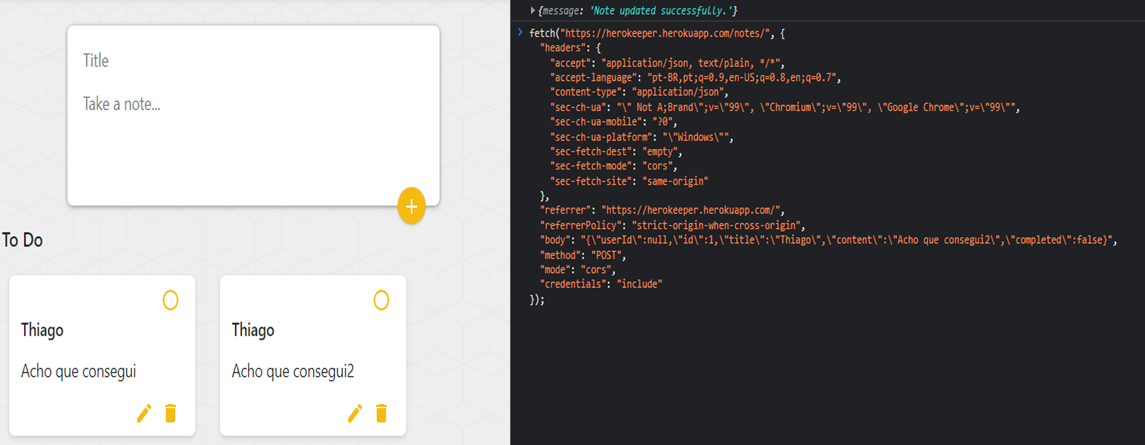
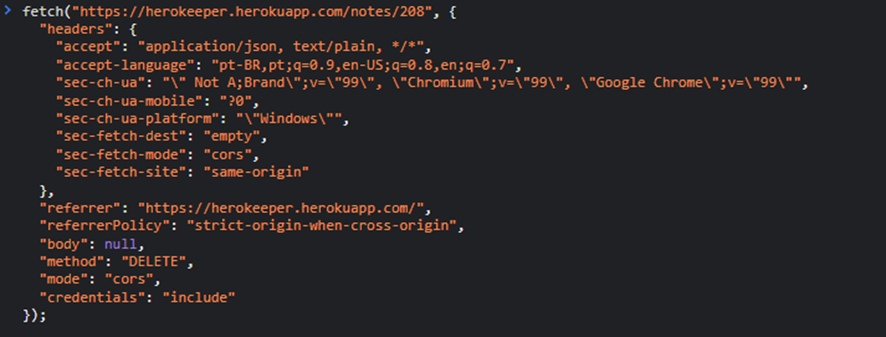

**Desafio Python**

In [ ]:
texto=str(input('entre com uma frase: ')).strip().upper()
vogais=['A','E','I','O','U']
char=list(texto)
i=0
for j in range(len(char)):
    if char[j] in vogais:
        i+=1
if i>0:
    print(f'{i} vogais encontradas')
else:
    print('Nehuma vogal encontrada') 

In [ ]:
texto=str(input('entre com uma frase: ')).strip().upper()
char=list(texto)
if len(char)%2 == 0:
    texto=texto[::-1]
print(texto.lower())

**Desafio SQL**

In [ ]:
import pandas as pd
from google.cloud import bigquery
import sys
import csv

if "kaggle_secrets" in sys.modules:
    from kaggle_secrets import UserSecretsClient
    UserSecretsClient().set_gcloud_credentials(project='minha-squad-minha-vida')
    
client = bigquery.Client()
dataset_ref = client.dataset("data", project="minha-squad-minha-vida")
dataset = client.get_dataset(dataset_ref)
                             
table_ref=dataset_ref.table("covid__country_regions")
table = client.get_table(table_ref)
countryregions= client.list_rows(table).to_dataframe()
                             
table_ref2=dataset_ref.table("covid__global_reports")
table2 = client.get_table(table_ref2)                        
globalreports= client.list_rows(table2).to_dataframe()

# countryregions.to_csv('countryregions.csv',index=False)
#globalreports.to_csv('globalreports.csv',index=False)

query = '''
WITH CTE1 AS(
    SELECT cr.country_region,
    CONCAT(EXTRACT(YEAR FROM gr.date),' - ', EXTRACT(MONTH FROM gr.date)) AS year_month, gr.deaths AS deaths, 
    EXTRACT(MONTH FROM gr.date) AS month, 
    EXTRACT(YEAR FROM gr.date) as year,EXTRACT(DAY FROM LAST_DAY(gr.date)) AS lastday, 
    EXTRACT(DAY FROM gr.date) AS day

    FROM `minha-squad-minha-vida.data.covid__country_regions` AS cr, 
        `minha-squad-minha-vida.data.covid__global_reports` AS gr

    WHERE cr.country_region_id = gr.country_region_id 
        AND EXTRACT(DAY FROM LAST_DAY(gr.date)) = EXTRACT(DAY FROM gr.date) 
        AND cr.country_region = 'Brazil'
        AND cr.country_region IS NOT NULL

    ORDER BY cr.country_region, year, month
    )
SELECT country_region, year_month, deaths
FROM CTE1
'''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query,job_config=safe_config)

data = query_job.to_dataframe()

                                                 
dataframe = pd.DataFrame(data)
print(dataframe.head())
#dataframe.to_csv('dataframe.csv',index=False)
table_id = "minha-squad-minha-vida.roberto.desafio_02"

job_config = bigquery.LoadJobConfig(
#     schema=[
#         bigquery.SchemaField("country_region", bigquery.enums.SqlTypeNames.STRING),
#     ],
#     write_disposition="WRITE_TRUNCATE",
)

job = client.load_table_from_dataframe(
    dataframe, table_id, job_config=job_config
)

job.result()
table = client.get_table(table_id)
print(f'{table.num_rows} linhas carregadas e {len(table.schema)} colunas para {table_id}')